<a href="https://colab.research.google.com/github/farrukh61/Implementing-KNN-and-SVM-Semester-Assignment/blob/main/Zoo_Animals_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


import seaborn as sns

In [ ]:
df = pd.read_csv('zoo.csv')
df.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,97,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,98,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,99,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,101,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


## Exploratoty Data Analysis

In [ ]:
df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [ ]:
# zoo data set missing value check
df.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

In [ ]:
# list of feature with NaN values
features_with_na = [features for features in df if df[features].isnull().any()==True]
features_with_na

[]

<AxesSubplot:>

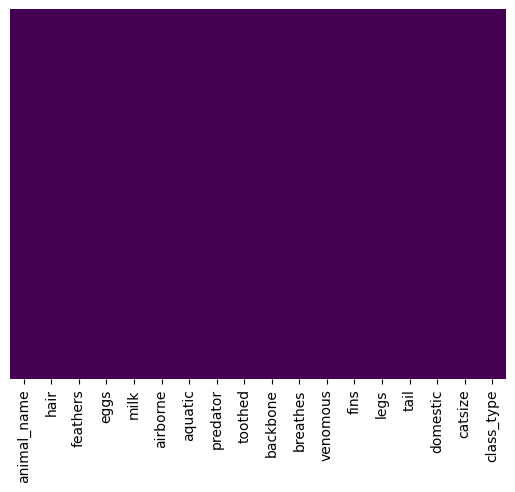

In [ ]:
# using seaborn's heatmap to visualize nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

### Value Counts

<AxesSubplot:xlabel='class_type', ylabel='count'>

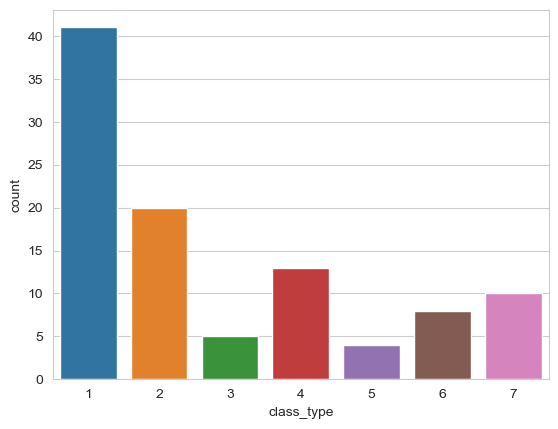

In [ ]:
# count of income classes
sns.set_style('whitegrid')
sns.countplot(x='class_type',data=df)

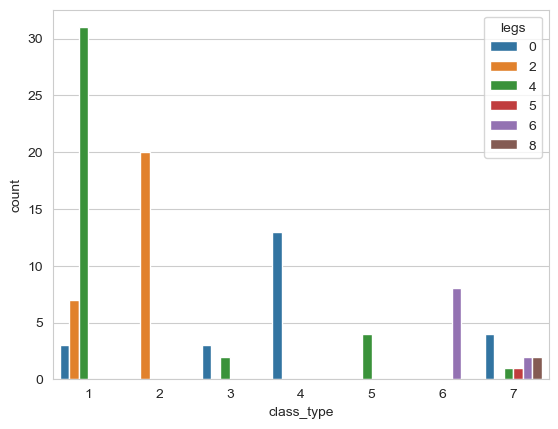

In [ ]:
# count of class_type based on legs
sns.set_style('whitegrid')
sns.countplot(x = 'class_type', hue = 'legs',data=df);

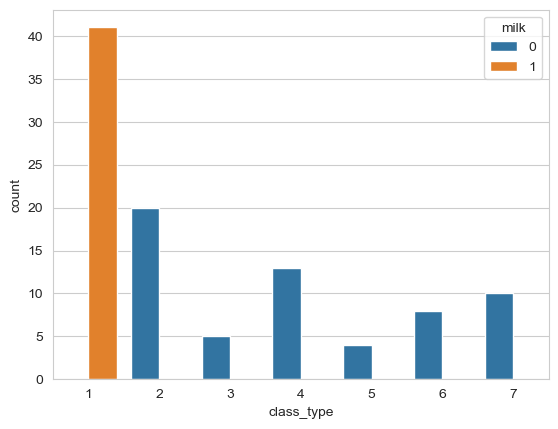

In [ ]:
# count of class_type based on milk
sns.set_style('whitegrid')
sns.countplot(x = 'class_type', hue = 'milk',data=df);

Text(0.5, 1.0, 'Correlation Heatmap')

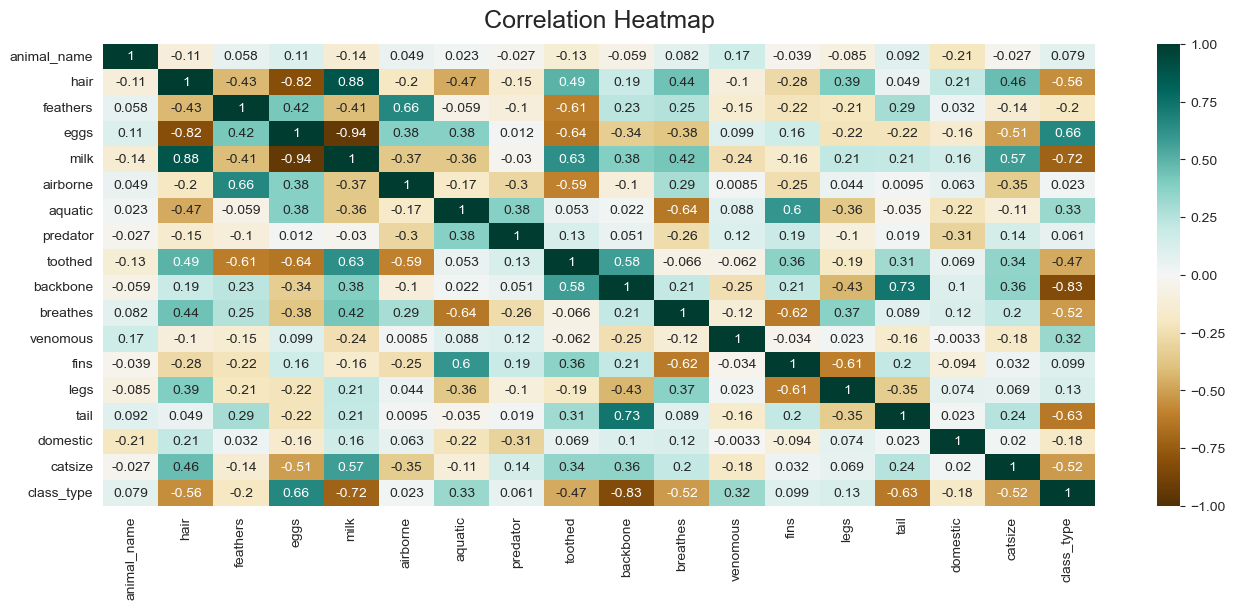

In [ ]:
# correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [ ]:
x = df.drop(['class_type','animal_name'],axis=1)
y=df.class_type

In [ ]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=345)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=345)

In [ ]:
print('labels count in target: ',np.bincount(y))
print('labels count in y_train: ',np.bincount(y_train))
print('labels count in y_val: ',np.bincount(y_val))
print('labels count in y_test: ',np.bincount(y_test))

labels count in target:  [ 0 41 20  5 13  4  8 10]
labels count in y_train:  [ 0 22 14  3  9  2  5  5]
labels count in y_val:  [ 0 10  3  1  1  1  0  4]
labels count in y_test:  [0 9 3 1 3 1 3 1]


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60,)
(20,)
(21,)


# Building SVM model

In [ ]:
# SVM with linear kernel
class SVM_classifier():
    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        self.models = []
        self.K = 0
        
    # fitting the dataset to SVM Classifier
    def fit(self, X, Y):
        self.K = len(np.unique(Y))
        self.models = []
        for k in range(self.K):
            y_modified = np.where(Y == k, 1, -1)
            model = self.train(X, y_modified)
            self.models.append(model)
    
    # the function for training a binary SVM classifier
    def train(self, X, Y):
        m, n = X.shape
        # initiating the weight value and bias value
        w = np.zeros(n)
        b = 0
        # implementing gradient Descent algorithm for optimization
        for i in range(self.no_of_iterations):
            # label encoding
            y_label = np.where(Y <= 0, -1, 1)
            # gradients (dw,db)
            for index, x_i in enumerate(X):
                condition = y_label[index] * (np.dot(x_i, w) - b) >= 1
                if condition:
                    dw = 2 * self.lambda_parameter * w
                    db = 0
                else:
                    dw = 2 * self.lambda_parameter * w - np.dot(x_i, y_label[index])
                    db = y_label[index]
                w = w - self.learning_rate * dw
                b = b - self.learning_rate * db
        return (w, b)
    
    # predict the label for a given input value
    def predict(self, X):
        scores = np.zeros((X.shape[0], self.K))
        for k in range(self.K):
            w, b = self.models[k]
            scores[:, k] = np.dot(X, w) - b
        predicted_labels = np.argmax(scores, axis=1)
        return predicted_labels

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sd = scaler.transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [ ]:
clf = SVM_classifier(learning_rate=0.01, no_of_iterations=1000, lambda_parameter=0.01)
clf.fit(x_train_sd,y_train)


In [ ]:
# accuracy on training data
y_train_pred = clf.predict(x_train_sd)
accuracy_train = accuracy_score(y_train,y_train_pred)
print('Train Accuracy',accuracy_train)



# accuracy on testing data
y_val_pred = clf.predict(x_val_sd)
accuracy_val = accuracy_score(y_val,y_val_pred)
print('Validation Accuracy',accuracy_val)


# accuracy on testing data
y_test_pred = clf.predict(x_test_sd)
accuracy_test = accuracy_score(y_test,y_test_pred)
print('Test Accuracy',accuracy_test)

Train Accuracy 0.9166666666666666
Validation Accuracy 0.75
Test Accuracy 0.9523809523809523


# With SKlearn

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=43)

scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train);
scaler.transform(x_test);

In [ ]:
print(x_train.shape)
print(x_test.shape)

(64, 16)
(21, 16)


In [ ]:
print(x_train.shape)
print(x_val.shape)

(64, 16)
(16, 16)


### RBF kernel

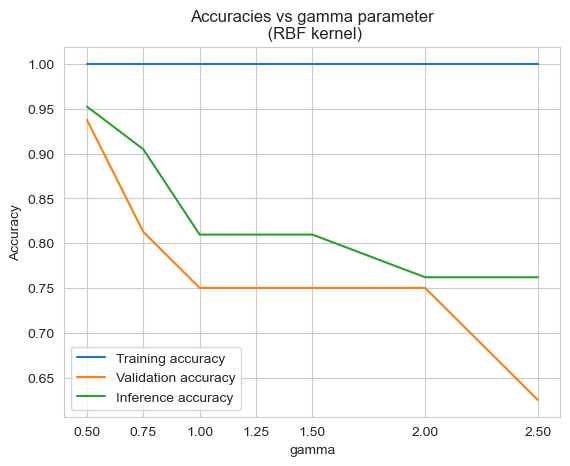

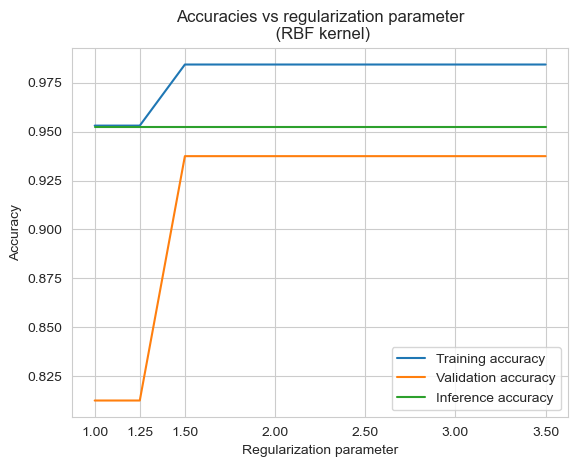

In [ ]:
# changing gamma


accuracy_train = []
accuracy_val = []
accuracy_test = []

gamma=np.array([0.5,0.75,1,1.25,1.5,2,2.5])
for g in gamma:
    clf = SVC(kernel='rbf',max_iter=100,gamma=g)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(gamma,accuracy_train,label ='Training accuracy')
plt.plot(gamma,accuracy_val,label = 'Validation accuracy')
plt.plot(gamma,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xticks(gamma)
plt.title('Accuracies vs gamma parameter\n (RBF kernel)')
plt.show()



# changing C

accuracy_train = []
accuracy_val = []
accuracy_test = []
C = [1,1.25,1.5,2,2.5,3,3.5]

for c in C:
    clf = SVC(kernel='rbf',max_iter=100,C=c)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(C,accuracy_train,label ='Training accuracy')
plt.plot(C,accuracy_val,label = 'Validation accuracy')
plt.plot(C,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy')
plt.xticks(C)
plt.title('Accuracies vs regularization parameter\n (RBF kernel)')
plt.show()

### poly kernel

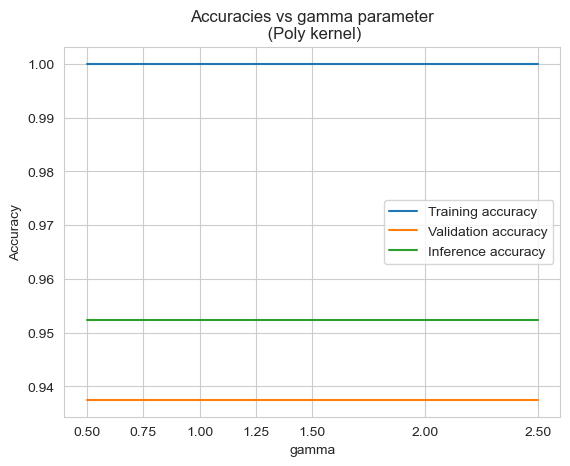

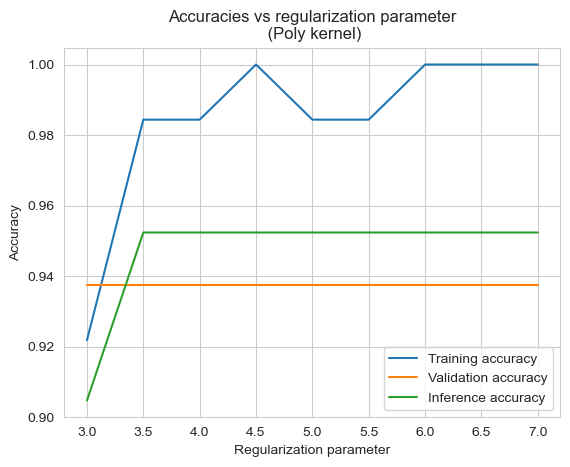

In [ ]:
# changing gamma


accuracy_train = []
accuracy_val = []
accuracy_test = []
C = [0.5,0.75,1,1.25,1.5,2,2.5]
gamma=np.array([0.5,0.75,1,1.25,1.5,2,2.5])
for g in gamma:
    clf = SVC(kernel='poly',gamma=g)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(gamma,accuracy_train,label ='Training accuracy')
plt.plot(gamma,accuracy_val,label = 'Validation accuracy')
plt.plot(gamma,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xticks(gamma)
plt.title('Accuracies vs gamma parameter\n (Poly kernel)')
plt.show()



# changing C

accuracy_train = []
accuracy_val = []
accuracy_test = []
C = [3,3.5,4,4.5,5,5.5,6,6.5,7]

for c in C:
    clf = SVC(kernel='poly',C=c)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(C,accuracy_train,label ='Training accuracy')
plt.plot(C,accuracy_val,label = 'Validation accuracy')
plt.plot(C,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy')
plt.xticks(C)
plt.title('Accuracies vs regularization parameter\n (Poly kernel)')
plt.show()

### sigmoid kernel

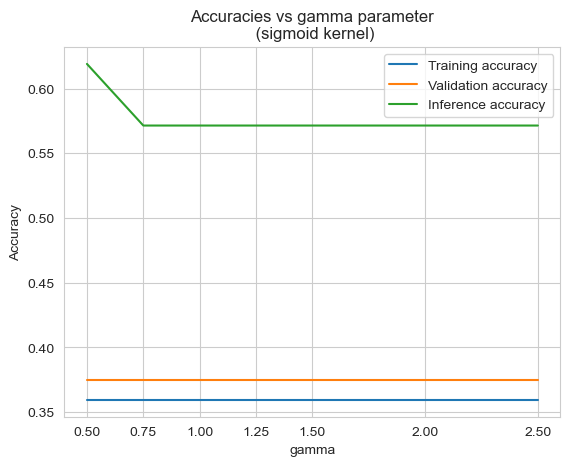

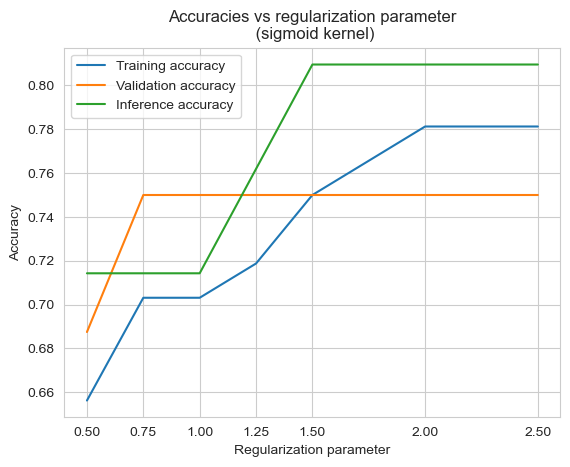

In [ ]:
# changing gamma


accuracy_train = []
accuracy_val = []
accuracy_test = []
C = [0.5,0.75,1,1.25,1.5,2,2.5]
gamma=np.array([0.5,0.75,1,1.25,1.5,2,2.5])
for g in gamma:
    clf = SVC(kernel='sigmoid',gamma=g)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(gamma,accuracy_train,label ='Training accuracy')
plt.plot(gamma,accuracy_val,label = 'Validation accuracy')
plt.plot(gamma,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xticks(gamma)
plt.title('Accuracies vs gamma parameter\n (sigmoid kernel)')
plt.show()



# changing C

accuracy_train = []
accuracy_val = []
accuracy_test = []
C = [0.5,0.75,1,1.25,1.5,2,2.5]

for c in C:
    clf = SVC(kernel='sigmoid',C=c)   # change gamma, C
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    y_pred_test = clf.predict(x_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
plt.plot(C,accuracy_train,label ='Training accuracy')
plt.plot(C,accuracy_val,label = 'Validation accuracy')
plt.plot(C,accuracy_test,label = 'Inference accuracy')
plt.legend()
plt.xlabel('Regularization parameter')
plt.ylabel('Accuracy')
plt.xticks(gamma)
plt.title('Accuracies vs regularization parameter\n (sigmoid kernel)')
plt.show()

### Selecting best hyperparameters through GridSearchCV

In [ ]:

param_grid = {'C': [0.5,0.75,1,1.25,1.5,2,2.5],
             'gamma': ['scale','auto',0.5,0.75,1,1.25,1.5,2,2.5],
             'kernel':['poly','rbf','sigmoid']}

# create GridSearchCV object with 5-fold cross validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, n_jobs=-1)

# fit the gridsearchcv object to the training data
grid_search.fit(x_train,y_train)

print('Best hyperparameter: ',grid_search.best_params_)



Best hyperparameter:  {'C': 0.5, 'gamma': 0.5, 'kernel': 'poly'}


In [ ]:
best_model = grid_search.best_estimator_
best_model

SVC(C=0.5, gamma=0.5, kernel='poly')

In [ ]:
print('Training accuracy: ',best_model.score(x_train, y_train))
print('\nInference accuracy: ',best_model.score(x_test, y_test))

Training accuracy:  1.0

Inference accuracy:  0.9523809523809523


In [ ]:
x_scaled = scaler.transform(x)
new_prediction = best_model.predict(x_scaled)
Y_actual = np.array(y)

# create empty dataframes with correct column names and data types
df_correct = pd.DataFrame(columns=['index'] + list(x.columns) + ['new_prediction', 'Y_actual'])
df_missclassify = pd.DataFrame(columns=['index'] + list(x.columns) + ['new_prediction', 'Y_actual'])

for i, cls in enumerate(new_prediction):
    if new_prediction[i] == Y_actual[i]:
        # populate df_correct using loc method
        row = [i] + list(x.iloc[i, :]) + [new_prediction[i], Y_actual[i]]
        df_correct.loc[i] = row
    else:
        # populate df_missclassify using loc method
        row = [i] + list(x.iloc[i, :]) + [new_prediction[i], Y_actual[i]]
        df_missclassify.loc[i] = row

C:\Users\Pakistan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
df_correct

,index,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,new_prediction,Y_actual
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
7,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,4
8,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
12,12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
13,13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7,7
14,14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7,7
15,15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,7
18,18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,4
19,19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1
34,34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,4


In [ ]:
df_missclassify

,index,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,new_prediction,Y_actual
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,7,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,7,1
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,7,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,7,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,7,2
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,7,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,7,6
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,7,1


In [ ]:
rows_to_copy1 = df_correct.loc[[2,7,8]]
rows_to_copy2 = df_missclassify.loc[[0,1,3]]
# write the selected rows to an Excel file
combined_df = pd.concat([rows_to_copy1, rows_to_copy2])
combined_df.to_excel('zoo_classification.xlsx', index=False, sheet_name='Sheet1')